In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [2]:
import pandas as pd

# 출력 옵션 설정
pd.set_option('display.max_rows', 50)  # 모든 행 출력
pd.set_option('display.max_columns', 50)  # 모든 열 출력

# 옵션 원래대로 되돌리기
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# 데이터 불러오고 모든 값이 null인 컬럼과 모든 값이 동일한 컬럼 제거

In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame()
for chunk in pd.read_csv("../ssd_data/combined_by_diskmodel/combined_MC2.csv", chunksize=100000):
    data = pd.concat([data, chunk], ignore_index=True)
data

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,n_12,...,r_244,n_245,r_245,n_175,r_175,n_232,r_232,label,n_211,r_211
0,10019,20190101,MC2,100.0,0.0,100.0,0.0,100.0,554.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13299,5346,20190101,MC2,100.0,0.0,100.0,0.0,100.0,12574.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13298,529,20190101,MC2,100.0,0.0,100.0,0.0,100.0,6009.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13297,5250,20190101,MC2,100.0,0.0,100.0,0.0,100.0,3475.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
13296,5243,20190101,MC2,100.0,0.0,100.0,0.0,100.0,2353.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664733,1726,20190630,MC2,100.0,0.0,100.0,0.0,100.0,12429.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3664732,17251,20190630,MC2,100.0,0.0,100.0,0.0,100.0,10400.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3664731,17241,20190630,MC2,100.0,0.0,100.0,0.0,100.0,9338.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3664789,18222,20190630,MC2,100.0,0.0,100.0,0.0,100.0,9050.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [2]:
data.shape

(3678445, 72)

In [3]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_170', 'r_170', 'n_171', 'r_171', 'n_172', 'r_172',
       'n_173', 'r_173', 'n_174', 'r_174', 'n_177', 'r_177', 'n_180', 'r_180',
       'n_181', 'r_181', 'n_182', 'r_182', 'n_183', 'r_183', 'n_184', 'r_184',
       'n_187', 'r_187', 'n_188', 'r_188', 'n_190', 'r_190', 'n_192', 'r_192',
       'n_194', 'r_194', 'n_195', 'r_195', 'n_196', 'r_196', 'n_197', 'r_197',
       'n_198', 'r_198', 'n_199', 'r_199', 'n_206', 'r_206', 'n_233', 'r_233',
       'n_241', 'r_241', 'n_242', 'r_242', 'n_244', 'r_244', 'n_245', 'r_245',
       'n_175', 'r_175', 'n_232', 'r_232', 'label', 'n_211', 'r_211'],
      dtype='object')

Null값으로 이루어진 열 제거

In [4]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    
    return df

In [5]:
data = remove_null_columns(data)
data.shape

(3678445, 46)

In [6]:
data.columns

Index(['disk_id', 'ds', 'model', 'n_1', 'r_1', 'n_5', 'r_5', 'n_9', 'r_9',
       'n_12', 'r_12', 'n_170', 'r_170', 'n_171', 'r_171', 'n_172', 'r_172',
       'n_173', 'r_173', 'n_174', 'r_174', 'n_180', 'r_180', 'n_183', 'r_183',
       'n_184', 'r_184', 'n_187', 'r_187', 'n_188', 'r_188', 'n_194', 'r_194',
       'n_195', 'r_195', 'n_196', 'r_196', 'n_197', 'r_197', 'n_198', 'r_198',
       'n_199', 'r_199', 'n_206', 'r_206', 'label'],
      dtype='object')

In [8]:
data.to_csv('../ssd_data/combined_by_diskmodel/combined_MC2_preprocessed.csv',index=False)

단일값으로만 이루어진 행 제거

In [9]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

In [10]:
data = remove_single_value_columns(data)

['model', 'n_9', 'n_12', 'n_174', 'n_180', 'n_183', 'n_184', 'r_184', 'n_187', 'n_188', 'n_195', 'n_196', 'n_197', 'r_197', 'n_198', 'n_199', 'n_206']


In [11]:
data

,disk_id,ds,n_1,r_1,n_5,r_5,r_9,r_12,n_170,r_170,...,r_187,r_188,n_194,r_194,r_195,r_196,r_198,r_199,r_206,label
0,10019,20190101,100.0,0.0,100.0,0.0,554.0,9.0,100.0,0.0,...,0.0,8.0,67.0,33.0,0.0,0.0,0.0,0.0,0.0,0
13299,5346,20190101,100.0,0.0,100.0,0.0,12574.0,13.0,100.0,0.0,...,0.0,10.0,62.0,38.0,0.0,0.0,0.0,0.0,0.0,0
13298,529,20190101,100.0,0.0,100.0,0.0,6009.0,18.0,100.0,0.0,...,0.0,16.0,78.0,22.0,0.0,0.0,0.0,0.0,0.0,0
13297,5250,20190101,100.0,0.0,100.0,0.0,3475.0,17.0,100.0,0.0,...,0.0,10.0,76.0,24.0,0.0,0.0,0.0,0.0,0.0,0
13296,5243,20190101,100.0,0.0,100.0,0.0,2353.0,15.0,100.0,0.0,...,0.0,5.0,81.0,19.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664733,1726,20190630,100.0,0.0,100.0,0.0,12429.0,17.0,100.0,0.0,...,0.0,23.0,66.0,34.0,0.0,0.0,0.0,0.0,0.0,0
3664732,17251,20190630,100.0,0.0,100.0,0.0,10400.0,19.0,100.0,0.0,...,0.0,22.0,78.0,22.0,0.0,0.0,0.0,0.0,0.0,0
3664731,17241,20190630,100.0,0.0,100.0,0.0,9338.0,29.0,100.0,0.0,...,0.0,23.0,75.0,25.0,0.0,0.0,0.0,0.0,0.0,0
3664789,18222,20190630,100.0,0.0,100.0,0.0,9050.0,23.0,100.0,0.0,...,0.0,30.0,78.0,22.0,0.0,0.0,0.0,0.0,0.0,0


null값 지우고 하나의 데이터로만 이루어진 열을 제거한 데이터 프레임 shape과 columns확인

In [12]:
data.shape

(3678445, 29)

In [13]:
column = data.columns
column

Index(['disk_id', 'ds', 'n_1', 'r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_170',
       'r_170', 'n_171', 'r_171', 'n_172', 'r_172', 'n_173', 'r_173', 'r_174',
       'r_180', 'r_183', 'r_187', 'r_188', 'n_194', 'r_194', 'r_195', 'r_196',
       'r_198', 'r_199', 'r_206', 'label'],
      dtype='object')

In [14]:
unique_disk_ids = data['disk_id'].nunique()
print("disk_id의 고유 개수:", unique_disk_ids)

disk_id의 고유 개수: 21942


fail이 일어난 행들 확인

In [15]:
data[data['label']==1]

,disk_id,ds,n_1,r_1,n_5,r_5,r_9,r_12,n_170,r_170,...,r_187,r_188,n_194,r_194,r_195,r_196,r_198,r_199,r_206,label
25949,4788,20190102,100.0,4.0,100.0,6.0,4522.0,16.0,100.0,6.0,...,3.0,15.0,58.0,42.0,1.0,6.0,0.0,0.0,0.0,1
55452,12228,20190103,100.0,1882.0,100.0,8.0,8825.0,15.0,100.0,8.0,...,1881.0,11.0,65.0,35.0,1.0,8.0,1.0,0.0,0.0,1
76033,2932,20190104,100.0,0.0,100.0,0.0,5138.0,44.0,100.0,0.0,...,0.0,41.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,1
107375,9665,20190106,100.0,7.0,100.0,3.0,4775.0,16.0,100.0,3.0,...,6.0,14.0,55.0,45.0,1.0,3.0,0.0,0.0,0.0,1
137604,14458,20190107,100.0,0.0,100.0,1.0,13218.0,13.0,100.0,1.0,...,0.0,10.0,56.0,44.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358932,14090,20190615,100.0,4.0,100.0,2.0,7660.0,31.0,100.0,2.0,...,4.0,5.0,75.0,25.0,0.0,2.0,2.0,0.0,0.0,1
3402616,7820,20190617,100.0,1.0,100.0,11.0,9105.0,301.0,100.0,11.0,...,0.0,765.0,60.0,40.0,1.0,11.0,1.0,0.0,0.0,1
3409305,8173,20190617,100.0,0.0,100.0,0.0,16575.0,14.0,100.0,0.0,...,0.0,10.0,63.0,37.0,0.0,0.0,0.0,0.0,0.0,1
3581119,7695,20190626,100.0,0.0,100.0,9.0,10394.0,14.0,100.0,9.0,...,0.0,23.0,75.0,25.0,0.0,9.0,1.0,0.0,0.0,1


# 결측치 확인

전체가 null인 컬럼과 단일값으로 이루어진 컬럼을 제거한 data에서 이제 null값을 알아보겠다.

In [16]:
null_counts = data.isnull().sum()
null_counts

disk_id      0
ds           0
n_1        215
r_1        215
n_5        218
r_5        218
r_9        200
r_12       196
n_170      192
r_170      192
n_171      201
r_171      201
n_172      202
r_172      202
n_173      209
r_173      209
r_174      210
r_180      197
r_183      204
r_187      197
r_188      198
n_194      200
r_194      200
r_195      192
r_196      199
r_198      195
r_199      204
r_206      204
label        0
dtype: int64

?? 몇개의 feature에서는 180개 정도의 결측치가 있고 몇개의 feature에서는 1299850정도의 결측치가 있다.</br>
여기에서 disk_id별로 날짜를 다시 sort해서 그림으로 보자

In [17]:
sorted_data = data.sort_values(by=['disk_id', 'ds'])
# 결과 출력
sorted_data

,disk_id,ds,n_1,r_1,n_5,r_5,r_9,r_12,n_170,r_170,...,r_187,r_188,n_194,r_194,r_195,r_196,r_198,r_199,r_206,label
4436,0,20190101,100.0,0.0,100.0,0.0,2816.0,21.0,100.0,0.0,...,0.0,24.0,82.0,18.0,0.0,0.0,0.0,0.0,0.0,0
27140,0,20190102,100.0,0.0,100.0,0.0,2844.0,21.0,100.0,0.0,...,0.0,24.0,82.0,18.0,0.0,0.0,0.0,0.0,0.0,0
44421,0,20190103,100.0,0.0,100.0,0.0,2868.0,21.0,100.0,0.0,...,0.0,24.0,82.0,18.0,0.0,0.0,0.0,0.0,0.0,0
75416,0,20190104,100.0,0.0,100.0,0.0,2892.0,21.0,100.0,0.0,...,0.0,24.0,82.0,18.0,0.0,0.0,0.0,0.0,0.0,0
81747,0,20190105,100.0,0.0,100.0,0.0,2916.0,21.0,100.0,0.0,...,0.0,24.0,83.0,17.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594016,23852,20190626,100.0,0.0,100.0,0.0,12406.0,17.0,100.0,0.0,...,0.0,9.0,61.0,39.0,0.0,0.0,0.0,0.0,0.0,0
3605224,23852,20190627,100.0,0.0,100.0,0.0,12430.0,17.0,100.0,0.0,...,0.0,9.0,61.0,39.0,0.0,0.0,0.0,0.0,0.0,0
3634084,23852,20190628,100.0,0.0,100.0,0.0,12454.0,17.0,100.0,0.0,...,0.0,9.0,63.0,37.0,0.0,0.0,0.0,0.0,0.0,0
3652003,23852,20190629,100.0,0.0,100.0,0.0,12478.0,17.0,100.0,0.0,...,0.0,9.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0


<AxesSubplot:>

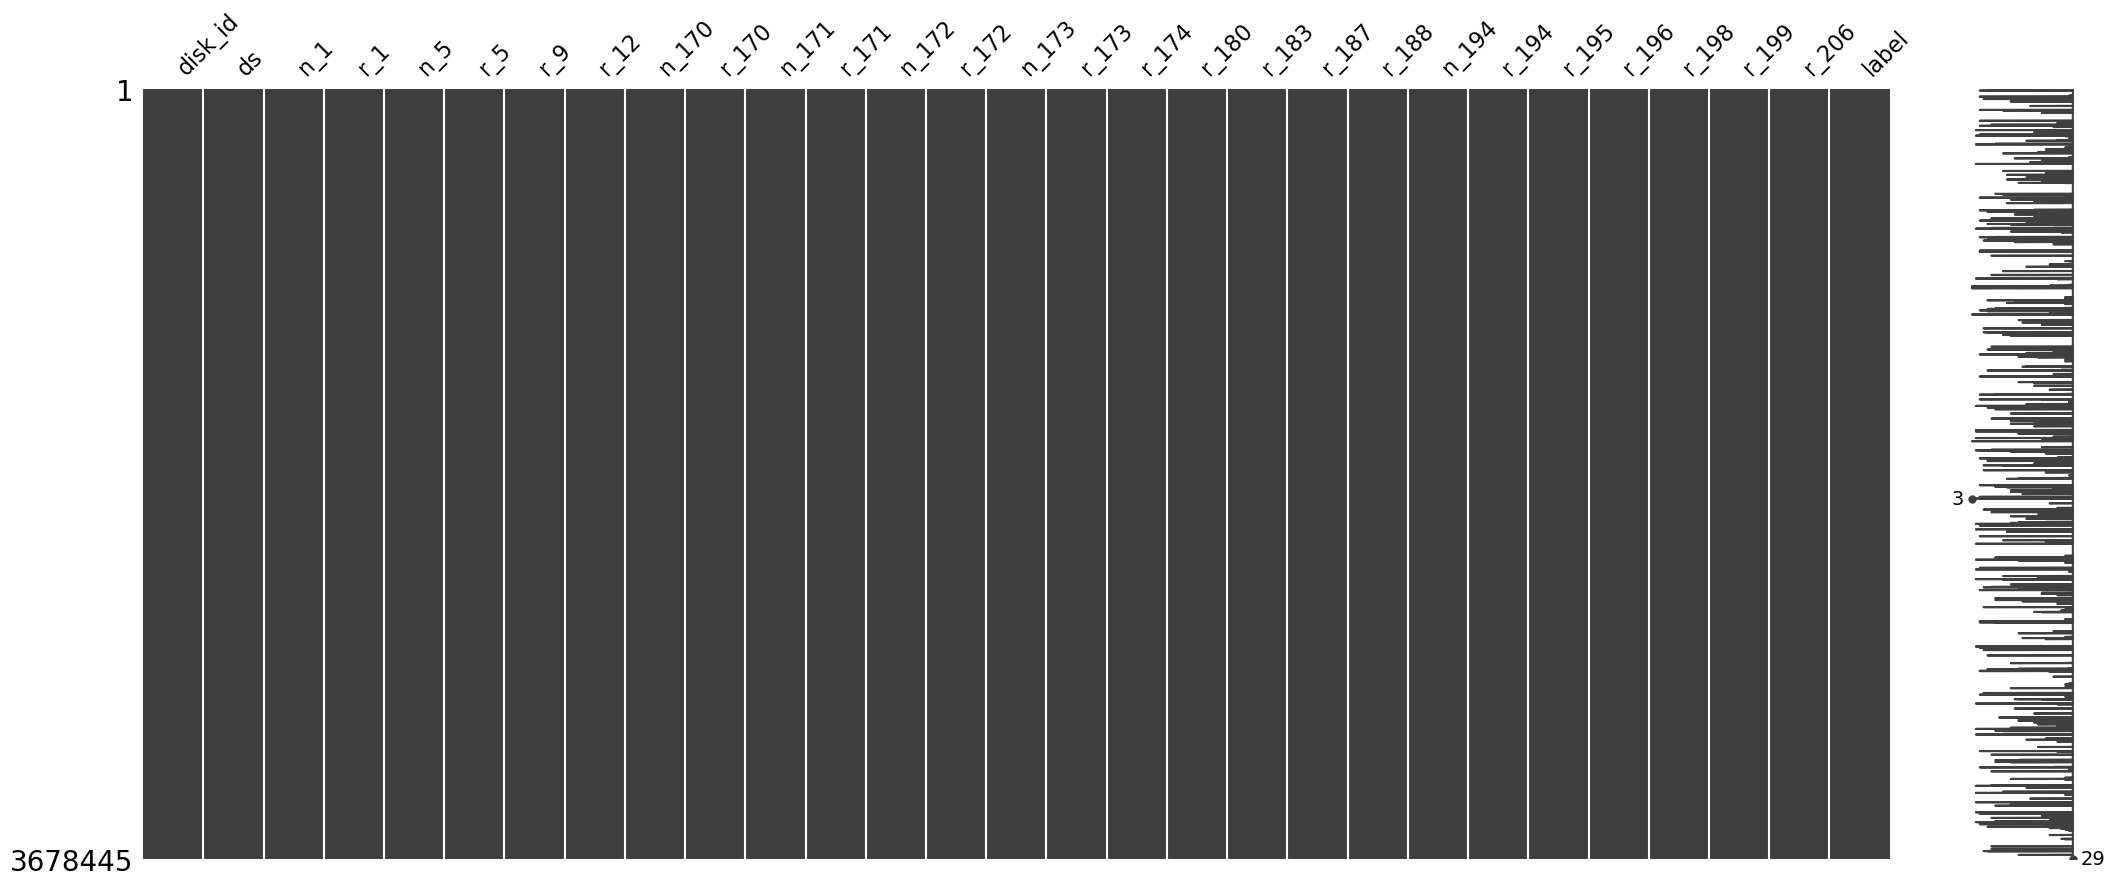

In [18]:
import missingno as msno
msno.matrix(sorted_data)

그림으로 보니까 이 null값들은 동시에 같이 가지는거같다. 그래서 동시에 이 feature에 대해서 null값을 가지는지 알아보자. 일단 지금은 1299850 정도의 결측치가 있는 컬럼에 적용시켜보자

In [20]:
# 원하는 컬럼 리스트
desired_columns = ['n_1', 'r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_170',
       'r_170', 'n_171', 'r_171', 'n_172', 'r_172', 'n_173', 'r_173', 'r_174',
       'r_180', 'r_183', 'r_187', 'r_188', 'n_194', 'r_194', 'r_195', 'r_196',
       'r_198', 'r_199', 'r_206']

# 동시에 null 값을 가지는 행 개수 계산
null_counts = data[desired_columns].isnull().all(axis=1).sum()

# 결과 출력
print("동시에 null 값을 가지는 행 개수:", null_counts)

동시에 null 값을 가지는 행 개수: 6


동시에 null값을 가지는 행이 1299740개나 있다. 즉 특정 feature들은 없으면 다같이 없다고 볼수 있다. </br>
이런 결측치를 가진 행의 disk_id가 어떠한지 알아보자.</br>
하나의 disk_id에서 전체가 다 기록이 안되는지 아니면 특정 시점부터 기록이 되는지 아니면 잘 기록되는데 몇몇개만 같이 빠져있는지 확인해보자</br>
r_174를 보면

일단 동시에 null을 가지는 행들을 따로 가져와서 null_rows라는 변수에 저장하자

In [21]:
# 원하는 컬럼 리스트
desired_columns = ['n_1', 'r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_170',
       'r_170', 'n_171', 'r_171', 'n_172', 'r_172', 'n_173', 'r_173', 'r_174',
       'r_180', 'r_183', 'r_187', 'r_188', 'n_194', 'r_194', 'r_195', 'r_196',
       'r_198', 'r_199', 'r_206']

# 동시에 null 값을 가지는 행 선택
null_rows = data[data[desired_columns].isnull().all(axis=1)]

# 결과 출력
null_rows

,disk_id,ds,n_1,r_1,n_5,r_5,r_9,r_12,n_170,r_170,...,r_187,r_188,n_194,r_194,r_195,r_196,r_198,r_199,r_206,label
302318,6176,20190116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
310518,6105,20190116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
308720,6978,20190116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1158830,6138,20190227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1584073,12702,20190320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3494187,10910,20190622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


그리고 disk_id 별로 이런 결측치 행이 몇개가 있는지 value_counts()로 알아보자

In [22]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 중복되는 disk_id 값과 중복 횟수 출력
print("중복되는 disk_id 값들과 중복 횟수:")
duplicate_counts

중복되는 disk_id 값들과 중복 횟수:


6176     1
6105     1
6978     1
6138     1
12702    1
10910    1
Name: disk_id, dtype: int64

In [25]:
# 중복되는 disk_id 값들과 중복 횟수 확인
duplicate_counts = null_rows['disk_id'].value_counts()

# 빈도가 180인 값들 선택
values_with_frequency_180 = duplicate_counts[duplicate_counts == 180]

# 빈도가 180인 값들의 개수
count_values_with_frequency_180 = len(values_with_frequency_180)

# 결과 출력
print("빈도가 180인 값들의 개수:", count_values_with_frequency_180)

빈도가 180인 값들의 개수: 0


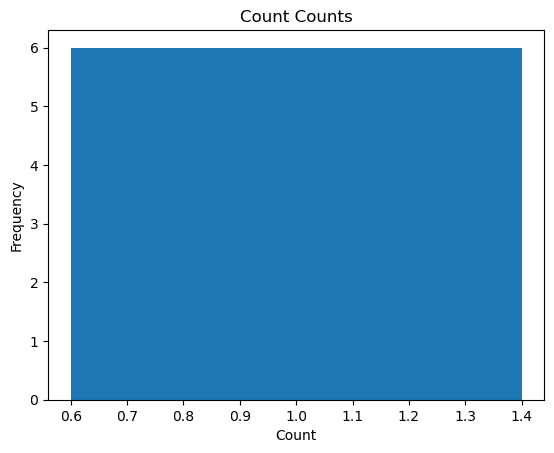

In [24]:
import matplotlib.pyplot as plt 
# 개수의 개수(count)를 계산
count_counts = duplicate_counts.value_counts()

# 막대 그래프 그리기
plt.bar(count_counts.index, count_counts.values)

# 그래프 제목과 라벨 설정
plt.title('Count Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')

# 그래프 출력
plt.show()

In [25]:
for disk_id, count in duplicate_counts.items():
    print("disk_id:", disk_id, "- 중복 횟수:", count)

disk_id: 6176 - 중복 횟수: 1
disk_id: 6105 - 중복 횟수: 1
disk_id: 6978 - 중복 횟수: 1
disk_id: 6138 - 중복 횟수: 1
disk_id: 12702 - 중복 횟수: 1
disk_id: 10910 - 중복 횟수: 1


정리를 하자면 특정 컬럼에서 동시에 null값을 가지는 행들에서 6개월동안 그러한 측정값을 가지고 있는 disk_id는 2153개가 있고 <br>
그래프를 보면 6개월동안 180개가 아닌 더 적은 개수로도 관측이 되는것을 볼수 있다. <br>
여기서 우리는 두가지로 생각할수 있는데 모든 disk_id에서 한번 그렇게 관측이 되면 그렇게 되는데 특정시점부터 관측이 되서 그런것인가<br>
아니면 제대로 모든 feature가 관측이 되고 있는데 중간중간 갑자기 관측이 안되는 경우인가<br>
이 두가지를 생각하면서 코드를 만들어야한다.

In [26]:
data[data['disk_id']==12702]

,disk_id,ds,n_1,r_1,n_5,r_5,r_9,r_12,n_170,r_170,...,r_187,r_188,n_194,r_194,r_195,r_196,r_198,r_199,r_206,label
2808,12702,20190101,100.0,0.0,100.0,0.0,1217.0,31.0,100.0,0.0,...,0.0,45.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0
27257,12702,20190102,100.0,0.0,100.0,0.0,1241.0,31.0,100.0,0.0,...,0.0,45.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0
39965,12702,20190103,100.0,0.0,100.0,0.0,1265.0,31.0,100.0,0.0,...,0.0,45.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0
66313,12702,20190104,100.0,0.0,100.0,0.0,1289.0,31.0,100.0,0.0,...,0.0,45.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0
93775,12702,20190105,100.0,0.0,100.0,0.0,1313.0,31.0,100.0,0.0,...,0.0,45.0,60.0,40.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543982,12702,20190624,100.0,0.0,100.0,0.0,5392.0,31.0,100.0,0.0,...,0.0,45.0,55.0,45.0,0.0,0.0,0.0,0.0,0.0,0
3568234,12702,20190625,100.0,0.0,100.0,0.0,5416.0,31.0,100.0,0.0,...,0.0,45.0,56.0,44.0,0.0,0.0,0.0,0.0,0.0,0
3605672,12702,20190627,100.0,0.0,100.0,0.0,5464.0,31.0,100.0,0.0,...,0.0,45.0,56.0,44.0,0.0,0.0,0.0,0.0,0.0,0
3652419,12702,20190629,100.0,0.0,100.0,0.0,5512.0,31.0,100.0,0.0,...,0.0,45.0,57.0,43.0,0.0,0.0,0.0,0.0,0.0,0


각각 개수에서 sample로 몇개 들고 왔을때는 중간부터 관측이 안되는것이 아니라 그냥 처음부터 관측은 다같이 안되는 것으로 보인다.<br>
즉 몇몇의 특성들은 다같이 처음부터 관측이 안 되는것으로 보인다.<br>
그런데 그런 행을 가진 disk_id가 하나일때 중간에 한번 안된것들로 보이는 값들도 있다.

# 여기서부터 코딩 해봐야해.....

뭔가 지금 해야할것이 우리가 특정 샘플들을 가져와서 하나씩 했는데 확실히 그게 다 맞는건인지 확인하는 코드?를 짜봐야할거같고<br>
한개일때 실제로 한개로 이루어진 disk_id랑 중간에 하나 결측치로 되어있는 disk_id가 있는데 그것을 어떻게 할지를 생각해봐야한다<br>
지금은 실제로 machine learning 모델을 돌릴때 한개들 다 삭제하고 싶다....
그리고 결측치가 180개로 이루어진건 뭔지 함 보고 insight를 쌓아햐함 아래에 r_1에서 결측치를 확인하는 코드를 좀 끄적이긴 했는데 더 해야대...

In [ ]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 하나 이상의 컬럼에 null 값을 가지지 않는 행 선택
non_null_rows = data[data[desired_columns].notnull().any(axis=1)]

# 결과 출력
non_null_rows

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,r_174,n_180,r_180,n_184,r_184,r_187,r_188,n_190,r_190,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
19059,3614,20190101,4.294967e+09,96.0,0.0,44475.0,26.0,100.0,0.0,100.0,0.0,69.0,23.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,89.0,11.0,11.0,1.120414e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125649e+12,0
19058,36107,20190101,4.294967e+09,97.0,0.0,40372.0,37.0,100.0,0.0,100.0,0.0,90.0,35.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,84.0,16.0,16.0,8.552900e+05,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19057,36104,20190101,4.294967e+09,98.0,0.0,40369.0,37.0,100.0,0.0,100.0,0.0,85.0,35.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,84.0,16.0,16.0,1.044777e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19056,361,20190101,3.276881e+09,95.0,2.0,46646.0,39.0,100.0,1.0,100.0,0.0,75.0,36.0,130.0,4.054609e+09,100.0,0.0,0.0,0.0,84.0,16.0,16.0,1.091491e+06,99.0,2.0,0.0,0.0,0.0,100.0,1.181125e+12,0
19055,36082,20190101,4.294967e+09,98.0,0.0,37598.0,40.0,100.0,0.0,100.0,0.0,85.0,38.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,81.0,19.0,19.0,1.006528e+07,100.0,0.0,0.0,0.0,0.0,100.0,9.455094e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728268,17792,20190630,4.294967e+09,98.0,0.0,43118.0,31.0,100.0,0.0,100.0,0.0,96.0,29.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,86.0,14.0,14.0,1.018570e+05,100.0,0.0,0.0,0.0,0.0,100.0,1.099828e+12,0
4728267,1779,20190630,4.294967e+09,98.0,0.0,45020.0,29.0,100.0,0.0,100.0,0.0,93.0,27.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,1.886397e+07,100.0,0.0,0.0,0.0,0.0,100.0,1.143073e+12,0
4728264,17715,20190630,4.294967e+09,96.0,0.0,40284.0,52.0,100.0,0.0,100.0,0.0,98.0,50.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,86.0,14.0,14.0,8.232852e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.018248e+12,0
4728273,17929,20190630,4.294967e+09,97.0,1.0,49490.0,47.0,100.0,0.0,100.0,0.0,60.0,44.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,86.0,14.0,14.0,4.142201e+08,99.0,1.0,0.0,0.0,0.0,100.0,1.241550e+12,0


In [ ]:
# 원하는 컬럼 리스트
desired_columns = ['r_12', 'n_171', 'r_171', 'n_172', 'r_172', 'r_174', 'n_184', 'r_184', 'r_187', 'r_188', 'n_190', 'r_190', 'r_195', 'r_197', 'r_198', 'r_199']

# 하나 이상의 컬럼에 null 값을 가지지 않고, label이 1인 행 선택
filtered_rows = data[data[desired_columns].notnull().any(axis=1) & (data['label'] == 1)]

# 결과 출력
filtered_rows

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,r_174,n_180,r_180,n_184,r_184,r_187,r_188,n_190,r_190,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
55936,23729,20190102,4.294967e+09,98.0,2.0,40175.0,28.0,100.0,4.0,100.0,0.0,1.0,26.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,80.0,20.0,20.0,1.067805e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.018337e+12,1
55019,3401,20190102,4.294967e+09,98.0,0.0,40012.0,59.0,100.0,0.0,100.0,0.0,1.0,57.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,84.0,16.0,16.0,2.260676e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.005077e+12,1
75070,30146,20190103,4.294967e+09,98.0,0.0,36922.0,30.0,100.0,0.0,100.0,0.0,1.0,28.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,82.0,18.0,18.0,1.591232e+09,100.0,0.0,0.0,0.0,0.0,100.0,9.407059e+11,1
70405,41793,20190103,4.294967e+09,98.0,0.0,36522.0,28.0,100.0,0.0,100.0,0.0,83.0,26.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,86.0,14.0,14.0,2.791970e+08,100.0,0.0,0.0,0.0,0.0,100.0,9.280304e+11,1
106266,37927,20190104,4.294967e+09,94.0,141.0,37481.0,30.0,99.0,70.0,100.0,0.0,1.0,28.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,92.0,8.0,8.0,2.748596e+09,97.0,141.0,0.0,0.0,0.0,100.0,9.497040e+11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112479,4402,20190603,4.294967e+09,98.0,3.0,41148.0,34.0,100.0,1.0,100.0,1.0,1.0,32.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,4.670091e+08,99.0,3.0,0.0,0.0,0.0,100.0,1.039979e+12,1
4178901,34874,20190605,4.294967e+09,98.0,0.0,40585.0,28.0,100.0,0.0,100.0,0.0,1.0,26.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,1.579518e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.035432e+12,1
4175174,1230,20190605,4.294967e+09,98.0,0.0,44244.0,27.0,100.0,0.0,100.0,0.0,1.0,25.0,130.0,4.294967e+09,100.0,0.0,0.0,3.0,81.0,19.0,19.0,2.581993e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125316e+12,1
4195779,38773,20190606,4.294967e+09,98.0,2.0,44298.0,37.0,100.0,2.0,100.0,0.0,1.0,35.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,84.0,16.0,16.0,1.970826e+09,99.0,2.0,0.0,0.0,0.0,100.0,1.121018e+12,1


In [ ]:
rows_with_missing_r1 = data[data['r_1'].isnull()]
rows_with_missing_r1[:100]

,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,r_174,n_180,r_180,n_184,r_184,r_187,r_188,n_190,r_190,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
21853,42362,20190101,NaN,NaN,NaN,NaN,27.0,100.0,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3107,23214,20190101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,2.658806e+07,100.0,0.0,0.0,0.0,0.0,100.0,9.496752e+11,0
2446,42366,20190101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,86.0,14.0,14.0,3.122873e+09,100.0,0.0,0.0,0.0,0.0,NaN,NaN,0
11578,42368,20190101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.992188e+09,100.0,0.0,0.0,0.0,0.0,NaN,NaN,0
13169,11673,20190101,NaN,98.0,0.0,36225.0,37.0,100.0,0.0,100.0,0.0,95.0,35.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,5.976232e+06,100.0,0.0,0.0,0.0,0.0,100.0,9.154515e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691350,32995,20190302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,87.0,13.0,13.0,6.139713e+08,100.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1791141,9232,20190305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,130.0,3.380104e+09,100.0,0.0,0.0,5.0,87.0,13.0,13.0,4.001040e+05,100.0,0.0,0.0,0.0,0.0,100.0,9.878659e+11,0
1797287,36062,20190306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,4.294967e+09,100.0,0.0,0.0,0.0,81.0,19.0,19.0,9.234537e+07,100.0,0.0,0.0,0.0,0.0,NaN,NaN,0
1831616,18612,20190307,NaN,94.0,0.0,47455.0,30.0,100.0,0.0,100.0,0.0,41.0,27.0,130.0,4.294967e+09,100.0,0.0,0.0,0.0,85.0,15.0,15.0,8.856299e+08,100.0,0.0,0.0,0.0,0.0,100.0,1.198631e+12,0


# disk_id랑 feature별로 scatter plot을 그려서 데이터 추세 파악하기</br>
이때 날짜가 없는 행은 null값으로 채운다

C:\Users\passion\AppData\Local\Temp/ipykernel_13876/574790240.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')


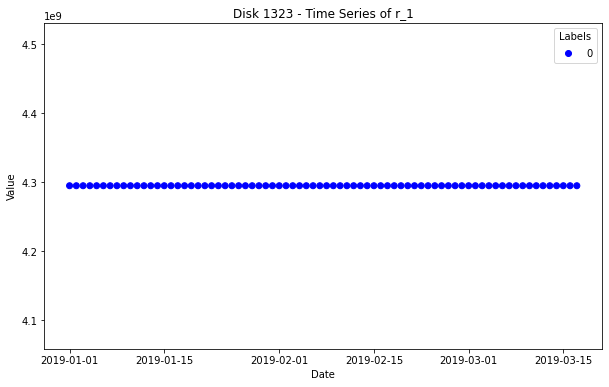

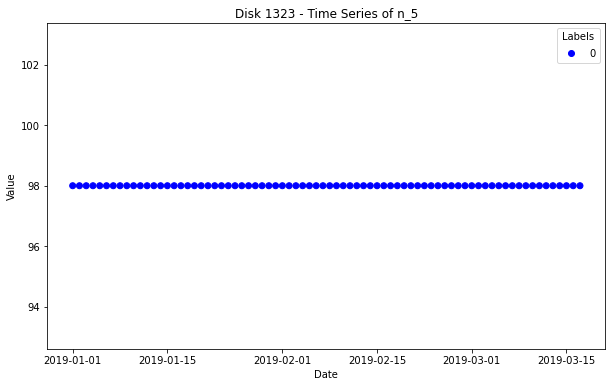

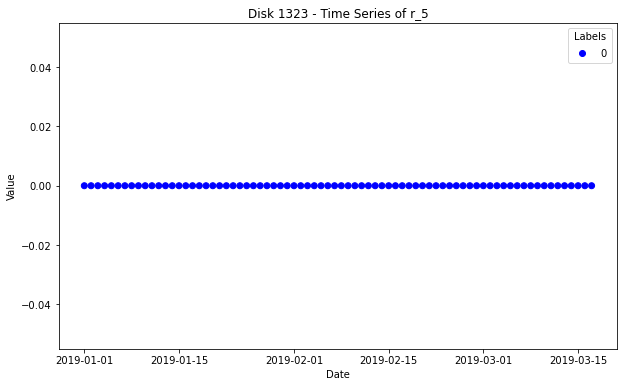

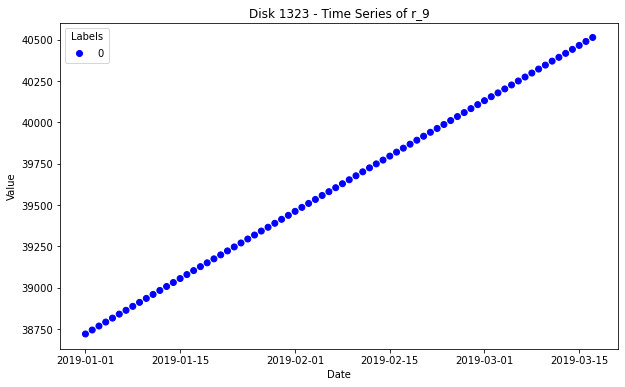

No non-missing data for feature r_12.
No non-missing data for feature n_171.
No non-missing data for feature r_171.
No non-missing data for feature n_172.
No non-missing data for feature r_172.


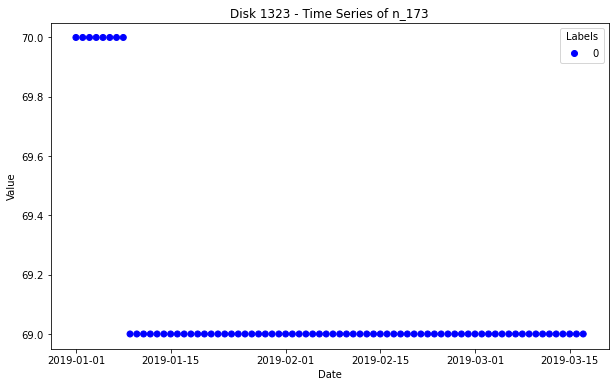

No non-missing data for feature r_174.


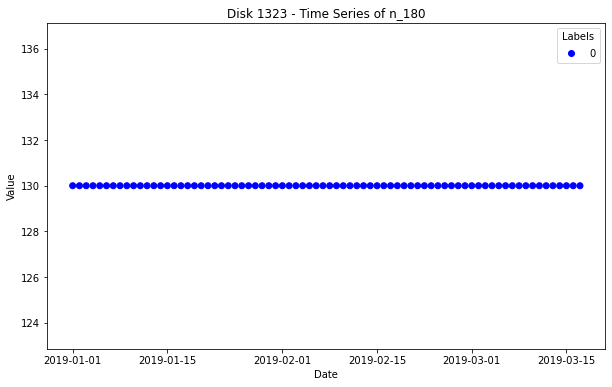

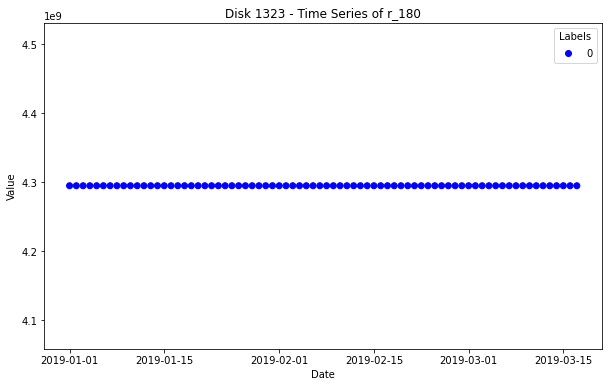

No non-missing data for feature n_184.
No non-missing data for feature r_184.
No non-missing data for feature r_187.
No non-missing data for feature r_188.
No non-missing data for feature n_190.
No non-missing data for feature r_190.


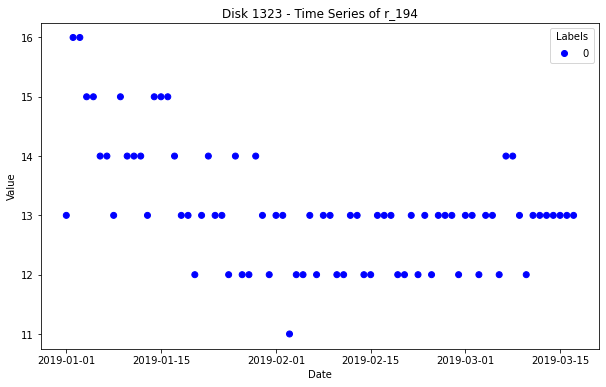

No non-missing data for feature r_195.


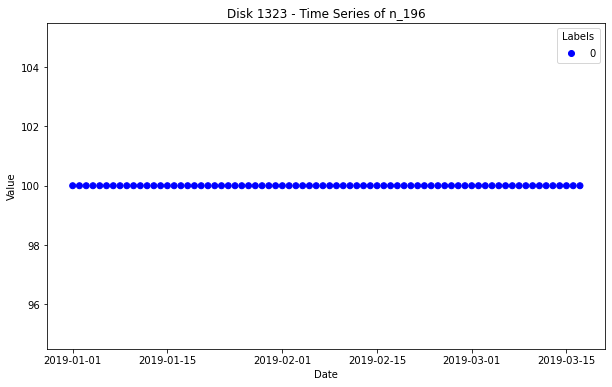

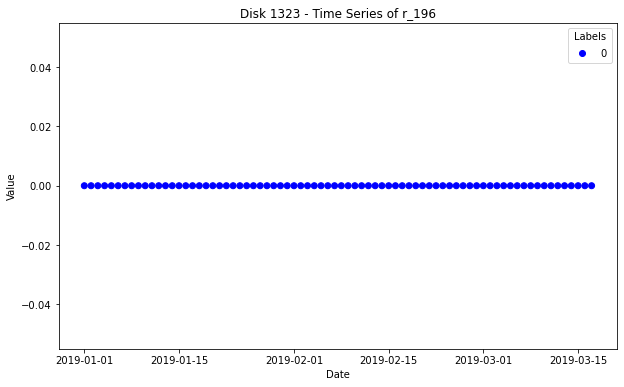

No non-missing data for feature r_197.
No non-missing data for feature r_198.
No non-missing data for feature r_199.


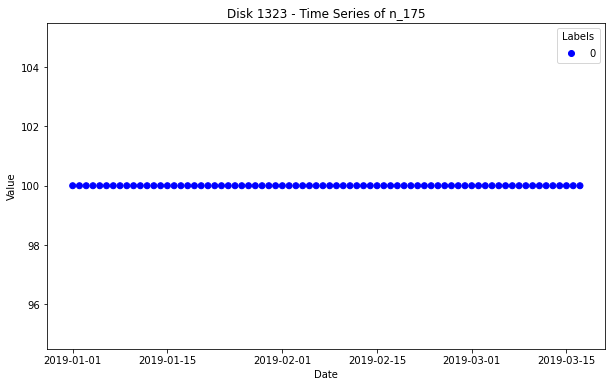

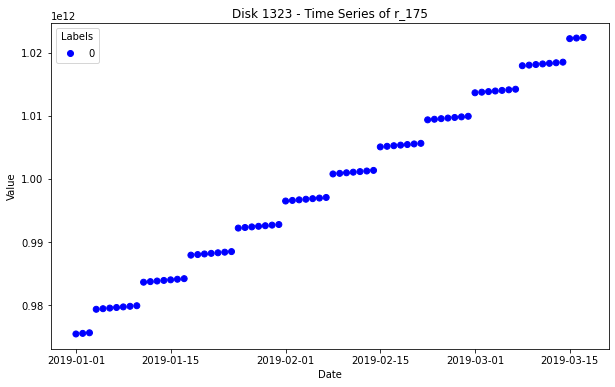

In [ ]:
disk_id = 1323
features = ['r_1', 'n_5', 'r_5', 'r_9', 'r_12', 'n_171', 'r_171',
       'n_172', 'r_172', 'n_173', 'r_174', 'n_180', 'r_180', 'n_184', 'r_184',
       'r_187', 'r_188', 'n_190', 'r_190', 'r_194', 'r_195', 'n_196', 'r_196',
       'r_197', 'r_198', 'r_199', 'n_175', 'r_175']

filtered_df = data[data['disk_id'] == disk_id]

if filtered_df.empty:
    print(f"No data available for disk_id {disk_id}.")
else:
    # 날짜(ds)를 datetime 형식으로 변환
    filtered_df['ds'] = pd.to_datetime(filtered_df['ds'], format='%Y%m%d')
    
    # 모든 날짜를 생성합니다.
    all_dates = pd.date_range(start=filtered_df['ds'].min(), end=filtered_df['ds'].max())
    
    # 모든 날짜를 포함하도록 filtered_df를 확장합니다.
    filtered_df = filtered_df.set_index('ds').reindex(all_dates).rename_axis('ds').reset_index()
    
    # label 결측치에 2를 할당합니다.
    filtered_df['label'] = filtered_df['label'].fillna(2)
    
    # 인덱스 재설정
    filtered_df = filtered_df.reset_index(drop=True)

    for feature in features:
        # 결측치가 아닌 값들에 대한 마스크를 생성합니다.
        mask = ~np.isnan(filtered_df[feature])  
        if mask.sum() > 0:  # NaN이 아닌 값이 있는지 확인합니다.
            fig, ax = plt.subplots(figsize=(10, 6))
            sc = ax.scatter(filtered_df['ds'].values[mask], filtered_df[feature].values[mask], c=filtered_df['label'].values[mask], cmap='bwr')
            ax.set_xlabel('Date')
            ax.set_ylabel('Value')
            ax.set_title(f'Disk {disk_id} - Time Series of {feature}')
            ax.legend(*sc.legend_elements(), title="Labels")
            plt.show()
        else:
            print(f"No non-missing data for feature {feature}.")

In [ ]:
null_counts = filtered_df.isnull().sum()
print(null_counts)

ds          0
disk_id     0
r_1         0
n_5         0
r_5         0
r_9         0
r_12       76
n_171      76
r_171      76
n_172      76
r_172      76
n_173       0
r_174      76
n_180       0
r_180       0
n_184      76
r_184      76
r_187      76
r_188      76
n_190      76
r_190      76
r_194       0
r_195      76
n_196       0
r_196       0
r_197      76
r_198      76
r_199      76
n_175       0
r_175       0
label       0
dtype: int64


In [ ]:
missing_dates = filtered_df[filtered_df[feature].isnull()]['ds']
print("Missing Dates:")
for date in missing_dates:
    print(date)

Missing Dates:


In [ ]:
filtered_df

,ds,disk_id,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,r_172,n_173,r_174,n_180,r_180,n_184,r_184,r_187,r_188,n_190,r_190,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,2019-01-01,1323,4.294967e+09,98.0,0.0,38721.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.754096e+11,0
1,2019-01-02,1323,4.294967e+09,98.0,0.0,38745.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.755037e+11,0
2,2019-01-03,1323,4.294967e+09,98.0,0.0,38769.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.755978e+11,0
3,2019-01-04,1323,4.294967e+09,98.0,0.0,38793.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.793263e+11,0
4,2019-01-05,1323,4.294967e+09,98.0,0.0,38817.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.794203e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2019-03-13,1323,4.294967e+09,98.0,0.0,40417.0,NaN,NaN,NaN,NaN,NaN,69.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.018424e+12,0
72,2019-03-14,1323,4.294967e+09,98.0,0.0,40441.0,NaN,NaN,NaN,NaN,NaN,69.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.018518e+12,0
73,2019-03-15,1323,4.294967e+09,98.0,0.0,40465.0,NaN,NaN,NaN,NaN,NaN,69.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.022246e+12,0
74,2019-03-16,1323,4.294967e+09,98.0,0.0,40489.0,NaN,NaN,NaN,NaN,NaN,69.0,NaN,130.0,4.294967e+09,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.022340e+12,0
